<a href="https://colab.research.google.com/github/GayathriShrikanth/DeepLearning/blob/master/J046_DL_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gayathri Shrikanth
Btech Data Science 
J046**

**DL Test 2**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls

drive  gdrive  sample_data


In [0]:
path="/content/gdrive/My Drive/UCMerced_LandUse.zip"

In [4]:
!unzip "/content/gdrive/My Drive/UCMerced_LandUse.zip"

Archive:  /content/gdrive/My Drive/UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  i

In [0]:
from contextlib import suppress
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from zipfile import ZipFile
from skimage.io import imread, imsave
from keras import applications
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
import glob
from PIL import Image
import numpy as np
import os
import glob
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

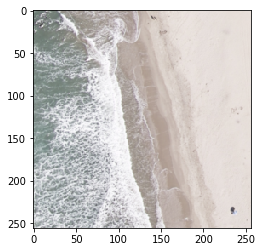

In [23]:
plt.imshow(imread('/content/UCMerced_LandUse/Images/beach/beach00.tif'))
plt.show()

Reading the Dataset

In [0]:
# def read_img(location):
#   X=[]
#   y=[]
#   dirs = os.listdir('/content/UCMerced_LandUse/Images/')
#   label = 0
#   for i in dirs:
#     print(i,label)
#     for pic in glob.glob('/content/UCMerced_LandUse/Images/'+i+'/*.tif'):
#       im = Image.open(pic)
#       im = np.array(im)
#       n=0
#       if((im.shape[0]==256) and (im.shape[1] ==256)): 
#         X.append(im)
#         y.append([label])
#         n = n + 1
#     label = label + 1
#   print(label)
#   return np.array(X),np.array(y)

#Version with in-built train test split
def read_img(location):
	x_train = []
	y_train = []
	x_test = []
	y_test = []
	dirs = os.listdir('/content/UCMerced_LandUse/Images/')
	label = 0
	for i in dirs:
		n = 0
		count = 0
		for pic in glob.glob('/content/UCMerced_LandUse/Images/'+i+'/*.tif'):
			im = Image.open(pic)
			im = np.array(im)
			if((im.shape[0]==256) and (im.shape[1] ==256) and count <90): #get only 90 data
				r = im[:,:,0]
				g = im[:,:,1]
				b = im[:,:,2]
				if(n<5): # 5 data in beginning set as test data
					x_test.append([r,g,b])
					y_test.append([label])
				else: #remaining data set as training data
					x_train.append([r,g,b])
					y_train.append([label])
				n = n + 1
				count = count + 1
		#print(count)
		label = label + 1
	return np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)


In [0]:
img_rows = 256
img_cols = 256
num_class = 21
x_train,y_train,x_test,y_test  = read_img('/content/UCMerced_LandUse/Images/')


Reshape the dataset, Data pre-processing

In [79]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 21)
y_test = keras.utils.to_categorical(y_test, 21)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_test[0:10])
print(y_train)

(1785, 256, 256, 3)
(1785, 21)
(105, 256, 256, 3)
(105, 21)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [62]:
print("length of X ",len(X))
print("length of y", len(y))

length of X  2056
length of y 2056


Train -Test Split

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

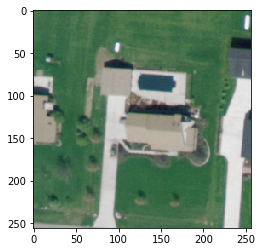

In [64]:
np.shape(x_test[1])
plt.imshow(x_test[100])

In [65]:
print("length of train ",len(x_train))
print("length of test", len(x_test))

length of train  1542
length of test 514


In [66]:
np.shape(x_train[1])

(256, 256, 3)

Model with data Augmentation

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 21)
y_test = keras.utils.to_categorical(y_test, 21)

In [81]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
  
datagen.fit(x_train)


# fits the model on batches with real-time data augmentation:
history=model.fit_generator(datagen.flow(x_train, y_train),epochs=50,verbose=1, validation_data=datagen.flow(x_test, y_test))



Epoch 1/50
56/56 [==============================] - 82s 1s/step - loss: 3.3385 - acc: 0.0469 - val_loss: 2.9841 - val_acc: 0.0857
Epoch 2/50
56/56 [==============================] - 80s 1s/step - loss: 2.9724 - acc: 0.0753 - val_loss: 2.8920 - val_acc: 0.1619
Epoch 3/50
56/56 [==============================] - 81s 1s/step - loss: 2.9270 - acc: 0.0884 - val_loss: 2.8054 - val_acc: 0.1238
Epoch 4/50
56/56 [==============================] - 80s 1s/step - loss: 2.8780 - acc: 0.1000 - val_loss: 2.7685 - val_acc: 0.1238
Epoch 5/50
56/56 [==============================] - 79s 1s/step - loss: 2.8610 - acc: 0.0953 - val_loss: 2.7977 - val_acc: 0.1429
Epoch 6/50
56/56 [==============================] - 85s 2s/step - loss: 2.7906 - acc: 0.1168 - val_loss: 2.7045 - val_acc: 0.1714
Epoch 7/50
56/56 [==============================] - 81s 1s/step - loss: 2.7493 - acc: 0.1368 - val_loss: 2.6369 - val_acc: 0.2000
Epoch 8/50
56/56 [==============================] - 80s 1s/step - loss: 2.6243 - acc: 0.17

Confusion Matrix

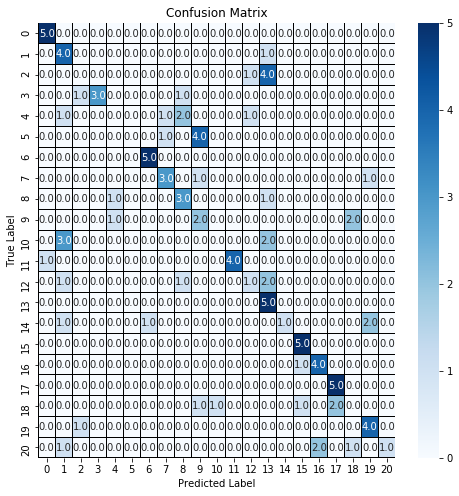

In [82]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Model Summary

In [83]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

Loss vs Epoch

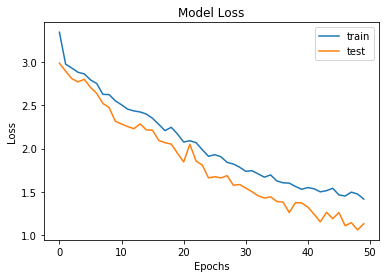

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Accuracy vs Epoch

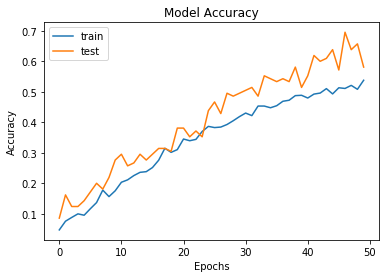

In [85]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()